# Guia 1
## Funciones y tipo de variables

In [1]:
# Importacion de recursos
from services.transformacion import LeerDatos, AnalisisExploratorio
from config.variables import Dataset
import seaborn as sns
import matplotlib.pyplot as plt
import re


# Documentación de la Clase `LeerDatos`

La clase `LeerDatos` está diseñada para leer archivos CSV y cargar su contenido en un `DataFrame` de pandas. A continuación, se detalla su funcionamiento y los métodos disponibles.

## Definición de la Clase

```python
import pandas as pd

class LeerDatos:
    def __init__(self, ruta_completa: str, tipo_archivo: str) -> None:
        self.ruta_completa = ruta_completa
        self.tipo_archivo = tipo_archivo
        self.df = None

    def leer_archivo_csv(self, separador: str = ',') -> pd.DataFrame:
        """
        Lee un archivo CSV y carga su contenido en un DataFrame.

        Parámetros:
        - separador: Caracter utilizado para separar las columnas en el archivo CSV (por defecto ',').

        Retorna:
        - DataFrame con el contenido del archivo CSV.
        """
        if self.tipo_archivo.lower() == 'csv':
            try:
                self.df = pd.read_csv(self.ruta_completa, encoding='utf-8', sep=separador)
            except FileNotFoundError:
                print(f"Error: El archivo en la ruta {self.ruta_completa} no se encuentra.")
                self.df = None
            except pd.errors.EmptyDataError:
                print("Error: El archivo está vacío.")
                self.df = None
            except pd.errors.ParserError:
                print("Error: Error de análisis del archivo CSV.")
                self.df = None
            except Exception as e:
                print(f"Error inesperado: {e}")
                self.df = None
        else:
            print("Error: Tipo de archivo no soportado. Se esperaba 'csv'.")
        return self.df


In [2]:
# Lectura de los datos en el archivos census_income-1.csv
df = LeerDatos(
    ruta_completa=Dataset.census_income,
    tipo_archivo='csv'
)
df.leer_archivo_csv(separador=',')
df.read_DataFrame(datos=df.df)

In [3]:
# Obtener informacion sobre e conjunto de datos 
df_dataset = AnalisisExploratorio(df=df.df) # Se instancia usando la salida .df como se muestra en el return self.df

In [4]:
# Extraer la informacion de tipo de datos de cada columna asi como la cantidad de filas registradas
df_dataset.informacion_Dataset()

Informacion sobre el DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      48842 non-null  int64 
 1   age             48842 non-null  int64 
 2   workclass       47879 non-null  object
 3   fnlwgt          48842 non-null  int64 
 4   education       48842 non-null  object
 5   education-num   48842 non-null  int64 
 6   marital-status  48842 non-null  object
 7   occupation      47876 non-null  object
 8   relationship    48842 non-null  object
 9   race            48842 non-null  object
 10  sex             48842 non-null  object
 11  capital-gain    48842 non-null  int64 
 12  capital-loss    48842 non-null  int64 
 13  hours-per-week  48842 non-null  int64 
 14  native-country  48568 non-null  object
 15  income          48842 non-null  object
dtypes: int64(7), object(9)
memory usage: 6.0+ MB
None




In [5]:
# Determinacion de valores nulos por cada columna
df_dataset.Filtro_nulos()

Cantidad de valores nulos por columna:
Unnamed: 0          0
age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

Total de valores nulos en el DataFrame: 2203


#### Explicacion del Dataset 
El conjunto de datos cuenta con 15 columnas, acontinuacion se describen los 2 tipos de datos encontrados
tipo_dato|Descripcion|
-----|-----|
int64|es un numero entero de 64 bits lo que ofrece mayor capacidad para almcenar numeros grandes|
object|Datos de tipo texto, se determina en funcion de descartar otro tipo de datos como int,date,datetime|

* Se usa el metodo info() de pandas el cual muestra la informacion por cada columna generando un resumen de la cantidad de filas registradas y el tipo de dato que ocupa la columna. Es importante anotar que a pesar de que python sean un leguaje de tipado dinamico se genera un tipo de datos por columna cuando se trabaja con DataFrame de pandas, lo cual quiero decir que en el momento de la lectura de los datos pandas va a generar de forma automtica un tipo de datos para columna y no diferentes tipo de datos por columna.

In [6]:
# Datos generales sobre indicadores de medidas de tendencia central o estadistica descriptiva
df_dataset.estadistiva_descriptiva()

Informacion sobre medidas de tendencia central


,Unnamed: 0,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,24420.500000,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,14099.615261,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,0.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,12210.250000,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,24420.500000,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,36630.750000,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,48841.000000,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


#### Explicacion estadistica descriptiva
La estadistiva descriptiva permite evaluar un conjunto de datos y dar un contexto sobre la cantidad de variables, y las medidas como la desviacion estandar, el promedio, el valor maximo y el valor minimo, ademas de los percentiles. Esto es importante porque permite ver que tan dispersos o compactos esta los datos

*Medidas de tendencia central*
|count|mean|std|min|25%|50%|75%|max|
|--|--|--|--|--|--|--|--|
|Cuenta la cantidad de filas existentes|es el promedio o media aritmetica de los en esta columna|La desviacion estandar muestra que tan separados esta los datos del promedio|es el valor minimo de la columan|Indica la cantidad de datos por debajo o igual al 25%|Indica la cantidad de datos por debajo o igual al 50%|Indica la cantidad de datos por debajo o igual al 75%|Indica el valor maximos en la serie|

# Graficos descriptivos
Informacion de distribucion del campó age del DataSet

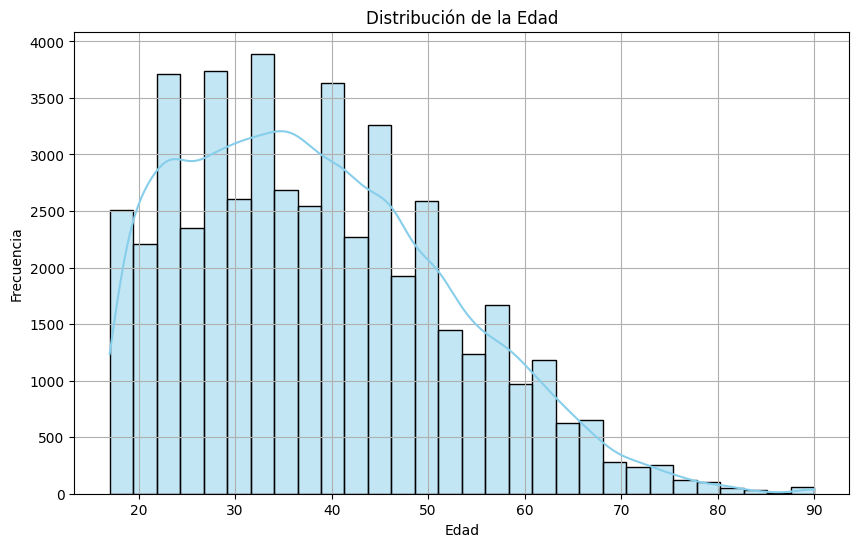

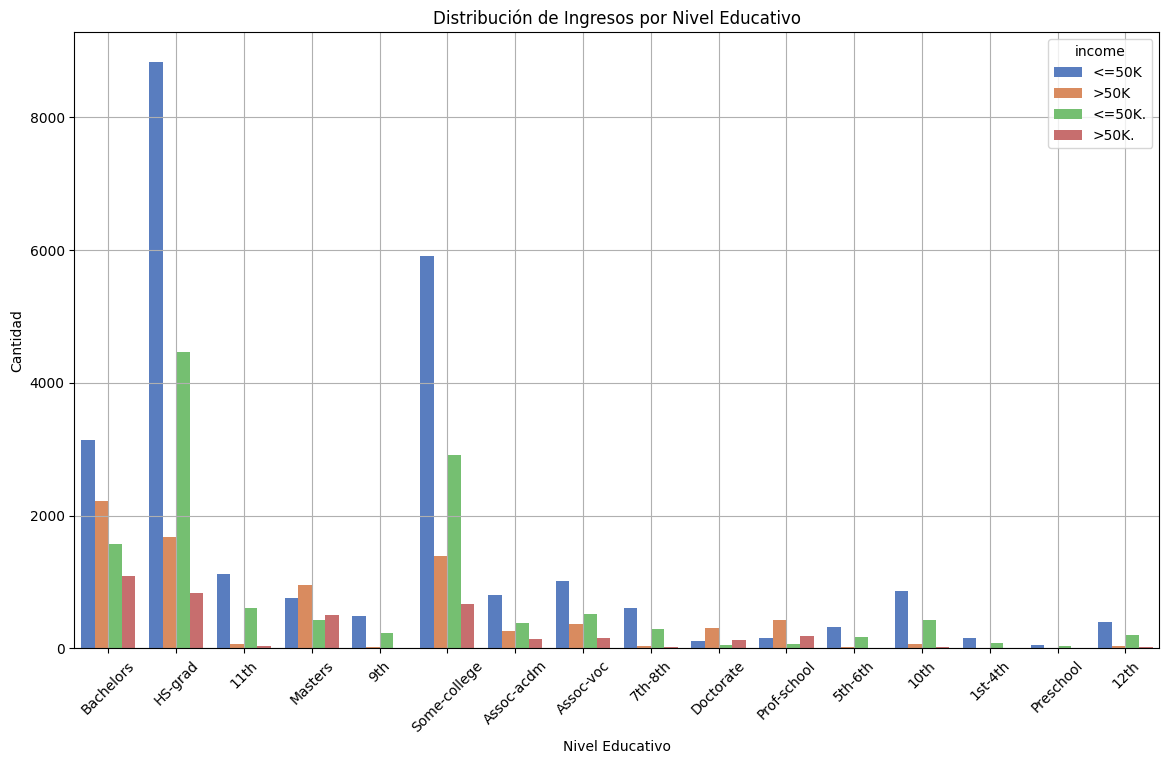

In [7]:
# 1. Histograma de la Distribución de Edad
plt.figure(figsize=(10, 6))
sns.histplot(df_dataset.df['age'], kde=True, bins=30, color='skyblue')
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

# 2. Gráfico de Barras de Ingresos por Nivel Educativo
plt.figure(figsize=(14, 8))
sns.countplot(data=df_dataset.df, x='education', hue='income', palette='muted')
plt.title('Distribución de Ingresos por Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [8]:
# Definir las columnas categóricas
categorias_col = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

# Usar un ciclo for para explorar cada columna categórica
for column in categorias_col:
    print(f"Explorando la columna: {column}")
    print(df_dataset.df[column].value_counts())  # Contar la frecuencia de cada categoría
    print(f"Valores únicos: {df_dataset.df[column].nunique()}")  # Número de valores únicos
    print("-" * 40)  # Separador para mejor legibilidad

Explorando la columna: workclass
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
Valores únicos: 9
----------------------------------------
Explorando la columna: education
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64
Valores únicos: 16
----------------------------------------
Explorando la columna: marital-status
marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated  

# Generacion de un metodo de filtrado
Este metodo es especialmente util para filtrar columnas de un DatFrame usando multiple etiquetas de filas
```python
    def filtrar_tabla(self,nombre_columna,lista_validacion=None,presentes=True,filtrar_vacios=False):
        """
        Realiza una validación cruzada en el DataFrame basado en una lista de valores, una columna específica,
        y/o campos vacíos.

        Este método filtra el DataFrame según los valores especificados en `lista_validacion` 
        para la columna `nombre_columna`. Dependiendo del parámetro `presentes`, se puede 
        filtrar para mantener solo las filas con valores presentes en `lista_validacion` 
        o eliminar dichas filas. También puede filtrar campos vacíos.

        Args:
            nombre_columna (str): El nombre de la columna en el DataFrame para realizar la validación cruzada.
            lista_validacion (list, optional): Una lista de valores a validar en la columna especificada. 
                                            Por defecto es None.
            presentes (bool, optional): Si es True, mantiene las filas con valores presentes en 
                                        `lista_validacion`. Si es False, elimina las filas con 
                                        valores presentes en `lista_validacion`. El valor 
                                        predeterminado es True.
            filtrar_vacios (bool, optional): Si es True, filtra los campos vacíos (NaN). El valor 
                                            predeterminado es False.

        Returns:
            pd.DataFrame: El DataFrame filtrado según los criterios especificados.
        
        Example:
            >>> df = pd.DataFrame({
            ...     'A': [1, 2, 3, 4, 5],
            ...     'B': ['a', 'b', 'c', 'd', 'e']
            ... })
            >>> mi_clase = MiClase(df)
            >>> resultado = mi_clase.validacion_cruzada('A', [2, 4], presentes=True)
            >>> print(resultado)
            A  B
            1  2  b
            3  4  d
        """
        datos = self.df.copy()
        
        if filtrar_vacios:
            if presentes:
                filtro = datos[nombre_columna].notna()
            else:
                filtro = datos[nombre_columna].isna()
        else:
            if lista_validacion is None:
                raise ValueError("Debe proporcionar una lista de validación o habilitar el filtrado de vacíos.")
            
            if presentes:
                filtro = datos[nombre_columna].isin(lista_validacion)
            else:
                filtro = ~datos[nombre_columna].isin(lista_validacion)
        
        resultado = datos[filtro]
        self.df = resultado
        return self.df

In [9]:
# Filtrar datos para estudio de DataFrame 
"""
Se genera un filtro usando la clase Transformacion y el metodo filtrar _tabla con el fin de pasar los paramatros 
nombre de columna education y filtrar solo las filas que tienen Masters
"""
df.filtrar_tabla(nombre_columna='education',lista_validacion=['Masters']).sample(2) # filtrar y mostar dos filas aletorias

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
28452,28452,53,Private,70387,Masters,14,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,4386,0,40,India,>50K
29153,29153,25,Private,239461,Masters,14,Never-married,Prof-specialty,Own-child,White,Male,0,0,35,United-States,<=50K


# Deteccion de columnas con caracteres especiales dentro del DataFrame

In [10]:
# Ejemplo 1: Cadena con caracteres especiales
text = "Esto, es una prueba....! generada por el estudiante @Nicolas Torres * Estudiante de Especializacion"
result = re.findall(r'[^\w\s]', text)
print(result)

[',', '.', '.', '.', '.', '!', '@', '*']


- La exprecion r'[^\w\s]' busca cualquier carácter que no sea alfanumérico (\w) ni espacio en blanco (\s). Esto incluye caracteres especiales como !, @, #, *, ,, etc.

In [11]:
# Deteccion de caracteres
print("\nColumnas con caracteres especiales:")
for column in df_dataset.df.columns:
    if df_dataset.df[column].dtype == 'object':
        caracteres_especiales = df_dataset.df[column].str.contains(r'[^\w\s]', regex=True).sum()
        if caracteres_especiales > 0:
            print(f"{column}: {caracteres_especiales} filas con caracteres especiales")


Columnas con caracteres especiales:
workclass: 13973 filas con caracteres especiales
education: 32869 filas con caracteres especiales
marital-status: 39161 filas con caracteres especiales
occupation: 42372 filas con caracteres especiales
relationship: 21670 filas con caracteres especiales
race: 1989 filas con caracteres especiales
native-country: 44908 filas con caracteres especiales
income: 48842 filas con caracteres especiales


# Informe de Exploración y Limpieza de Datos

## Introducción

Este documento detalla el proceso de exploración y limpieza de variables en una base de datos dada. Se han realizado las siguientes actividades en bloques de código y Markdown dentro de un archivo Jupyter Notebook:

1. **Exploración de Variables:**
   - Se determinó el tipo de cada variable.
   - Se aplicaron funciones para:
     - Contar la cantidad total de valores.
     - Identificar valores distintos.
     - Contar la cantidad de valores nulos.
   - Se proporcionó una descripción detallada de las variables exploradas.

2. **Limpieza de Datos:**
   - Se identificaron variables con caracteres adicionales o de baja calidad.
   - Se aplicaron funciones para limpiar las variables seleccionadas.

## Exploración de Variables
Las variables de la base de datos fueron cargadas y se determinó su tipo utilizando las herramientas proporcionadas en los materiales de estudio. 
Las funciones aplicadas para la exploración incluyenron mediante la construccion y uso de la clase AnalisisExploratorio


Gracias